<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [56]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Hotel Review Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

In [2]:
train_df = pd.read_csv('train_dataframe.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13651 entries, 0 to 13650
Columns: 2587 entries, Additional_Number_of_Scoring to Reviewer_Score
dtypes: float64(2587)
memory usage: 269.4 MB


In [3]:
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [6]:
test_df = pd.read_csv('test_dataframe.csv')

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Columns: 2587 entries, Additional_Number_of_Scoring to Reviewer_Score
dtypes: float64(2587)
memory usage: 67.4 MB


In [ ]:
train_df = train_df.sample(frac=0.1, random_state=42)
test_df = test_df.sample(frac=0.1, random_state=42)

In [4]:
X_train = train_df.iloc[:,:-1]
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_worked,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [5]:
y_train = train_df.iloc[:,-1]
y_train.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Reviewer_Score, dtype: float64

In [8]:
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
print('Train Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))
print('Computation Time: ', timeit.timeit)

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8272654018020658
0.7896278933489599


In [14]:
coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficient': lr.coef_[0]})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

In [15]:
coef_df

,feature,coef
2522,p_upgraded,2.059033
1719,p_amazing,2.037435
1978,p_fantastic,1.781315
1228,n_perfect,1.706760
2308,p_professional,1.698139
...,...,...
1561,n_tiny,-1.797868
722,n_dated,-1.839281
753,n_dirty,-2.228388
1366,n_room,-2.232058


In [16]:
word_df = coef_df[coef_df.feature.str.contains('^[n,p]_')]
word_df

,feature,coef
2522,p_upgraded,2.059033
1719,p_amazing,2.037435
1978,p_fantastic,1.781315
1228,n_perfect,1.706760
2308,p_professional,1.698139
...,...,...
1561,n_tiny,-1.797868
722,n_dated,-1.839281
753,n_dirty,-2.228388
1366,n_room,-2.232058


In [17]:
twenty_df = word_df.head(20).append(word_df.tail(20))
twenty_df

,feature,coef
2522,p_upgraded,2.059033
1719,p_amazing,2.037435
1978,p_fantastic,1.781315
1228,n_perfect,1.706760
2308,p_professional,1.698139
1972,p_fabulous,1.644790
2005,p_friendliness,1.591903
2271,p_perfect,1.561669
1955,p_excellent,1.513672
850,n_fault,1.504318


## Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
scale_lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200).fit(X_train_scale, y_train)
print(scale_lr.score(X_train_scale, y_train))
print(scale_lr.score(X_test_scale, y_test))
print(timeit.timeit())

print('Train Accuracy: ', scale_lr.score(X_train_scale, y_train))
print('Test Accuracy: ', scale_lr.score(X_test_scale, y_test))
print('Computation Time: ', timeit.timeit())

0.8668229433741118
0.7497802519777322
0.028860199999996894


In [24]:
coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficeint': scale_lr.coef_[0]})
coef_df.sort_values(by='coef', ascending=False, inplace=True)
word_df = coef_df[coef_df.feature.str.contains('^[n,p]_')]
twenty_df = word_df.head(20).append(word_df.tail(20))
twenty_df

,feature,coef
2511,p_truly,0.356157
2114,p_kindly,0.329284
1719,p_amazing,0.310847
1955,p_excellent,0.292575
2213,p_movies,0.278636
2308,p_professional,0.276673
2046,p_half,0.266106
1078,n_loved,0.264558
2016,p_future,0.257390
2099,p_ironing,0.239765


## Principle Component Analysis

In [31]:
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
X_train_scale_pca = pca.fit_transform(X_train_scale)
X_test_scale_pca = pca.transform(X_test_scale)

In [32]:
from sklearn.linear_model import LogisticRegression
pca_lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200).fit(X_train_scale_pca, y_train)
print('Train Accuracy: ', pca_lr.score(X_train_scale_pca, y_train))
print('Test Accuracy: ', pca_lr.score(X_test_scale_pca, y_test))
print('Computation Time: ', timeit.timeit())

0.8069738480697385
0.7843539408145327
0.036189700000250014


In [ ]:
# + improved test accuracy 
# - lost interpreability


# K Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train_scale_pca, y_train)
print(knn.score(X_train_scale_pca, y_train))
print(knn.score(X_test_scale_pca, y_test))
print(timeit.timeit())

0.6499157570873929
0.6067975388221506
0.018495700001949444


## Sampling

In [67]:
train_sample_df = train_df.sample(frac=0.02, random_state=42)
test_sample_df = test_df.sample(frac=0.02, random_state=42)

In [68]:
X_train_sample = train_sample_df.iloc[:,:-1]
y_train_sample = train_sample_df.iloc[:,-1]
X_test_sample = test_sample_df.iloc[:,:-1]
y_test_sample = test_sample_df.iloc[:,-1]

In [69]:
scaler = StandardScaler()
X_train_sample_scale = scaler.fit_transform(X_train_sample)
X_test_sample_scale = scaler.transform(X_test_sample)

In [70]:
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_sample_scale_pca = pca.fit_transform(X_train_sample_scale)
X_test_sample_scale_pca = pca.transform(X_test_sample_scale)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train_sample_scale_pca, y_train_sample)
print(knn.score(X_train_sample_scale_pca, y_train_sample))
print(knn.score(X_test_sample_scale_pca, y_test_sample))
print(timeit.timeit())

0.5787545787545788
0.5147058823529411
0.014617599998018704


In [ ]:
+ computation time 
- test accuracy 

## Optimal Number of Neighbors

In [74]:
train_accuracies = []
test_accuracies = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train_sample_scale_pca, y_train_sample)
    train_accuracies.append(knn.score(X_train_sample_scale_pca, y_train))
    test_accuracies.append(knn.score(X_test_sample_scale_pca, y_test))    

plt.plot(range(1,30), train_accuracies)
plt.plot(range(1,30), test_accuracies)

ValueError: Found input variables with inconsistent numbers of samples: [13651, 273]

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = []
for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train_scale_pca, y_train)
    cv_score = np.mean(cross_val_score(lr, X_train_scale_pca, y_train, cv = 5))
    
    accuracies.append(cv_score)

plt.plot(RANGE, accuracies, label="Cross Validation Score", marker='.')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

NameError: name 'RANGE' is not defined

Text(0, 0.5, 'Cross Validation Score')

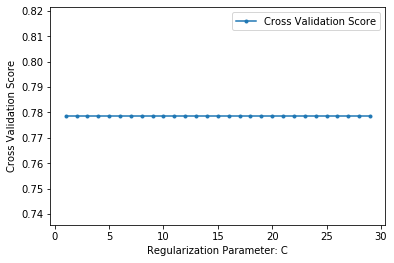

In [40]:
plt.plot(range(1,30), accuracies, label="Cross Validation Score", marker='.')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

print(knn.score(X_train_scale_pca, y_train))
print(knn.score(X_test_scale_pca, y_test))
print(timeit.timeit())

0.6433228334920519
0.6050395546440082
0.016668700001901016


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(iris_lr, X_remainder, y_remainder, cv = 5)
print(scores)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(iris_lr, X_remainder, y_remainder, cv = 5)
print(scores)